<a href="https://colab.research.google.com/github/sametgirgin/Machine-Learning-Classification-Models/blob/master/DecisionTreeModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving pima-indians-diabetes.data.csv to pima-indians-diabetes.data (1).csv


In [0]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [0]:
import io
dataset = pd.read_csv(io.BytesIO(uploaded['pima-indians-diabetes.data.csv']))
# Dataset is now stored in a Pandas Dataframe

In [10]:
dataset.columns = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
dataset.head(4)

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1


In [0]:
predictor_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

In [0]:
X= dataset[predictor_cols]
y= dataset.label

#Veriyi dağıtma süreci
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

#Building Decision Tree Model-Create a classifier object and fit the train dataset
decision_tree_model= DecisionTreeClassifier().fit(X_train,y_train)

#Predict the test dataset
y_pred= decision_tree_model.predict(X_test)

#Evaluating the Model: 
accuracy = metrics.accuracy_score(y_test,y_pred) #accuracy 

cm= metrics.confusion_matrix(y_test,y_pred) #confusion matrix

In [16]:
cm

array([[122,  36],
       [ 31,  42]])

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


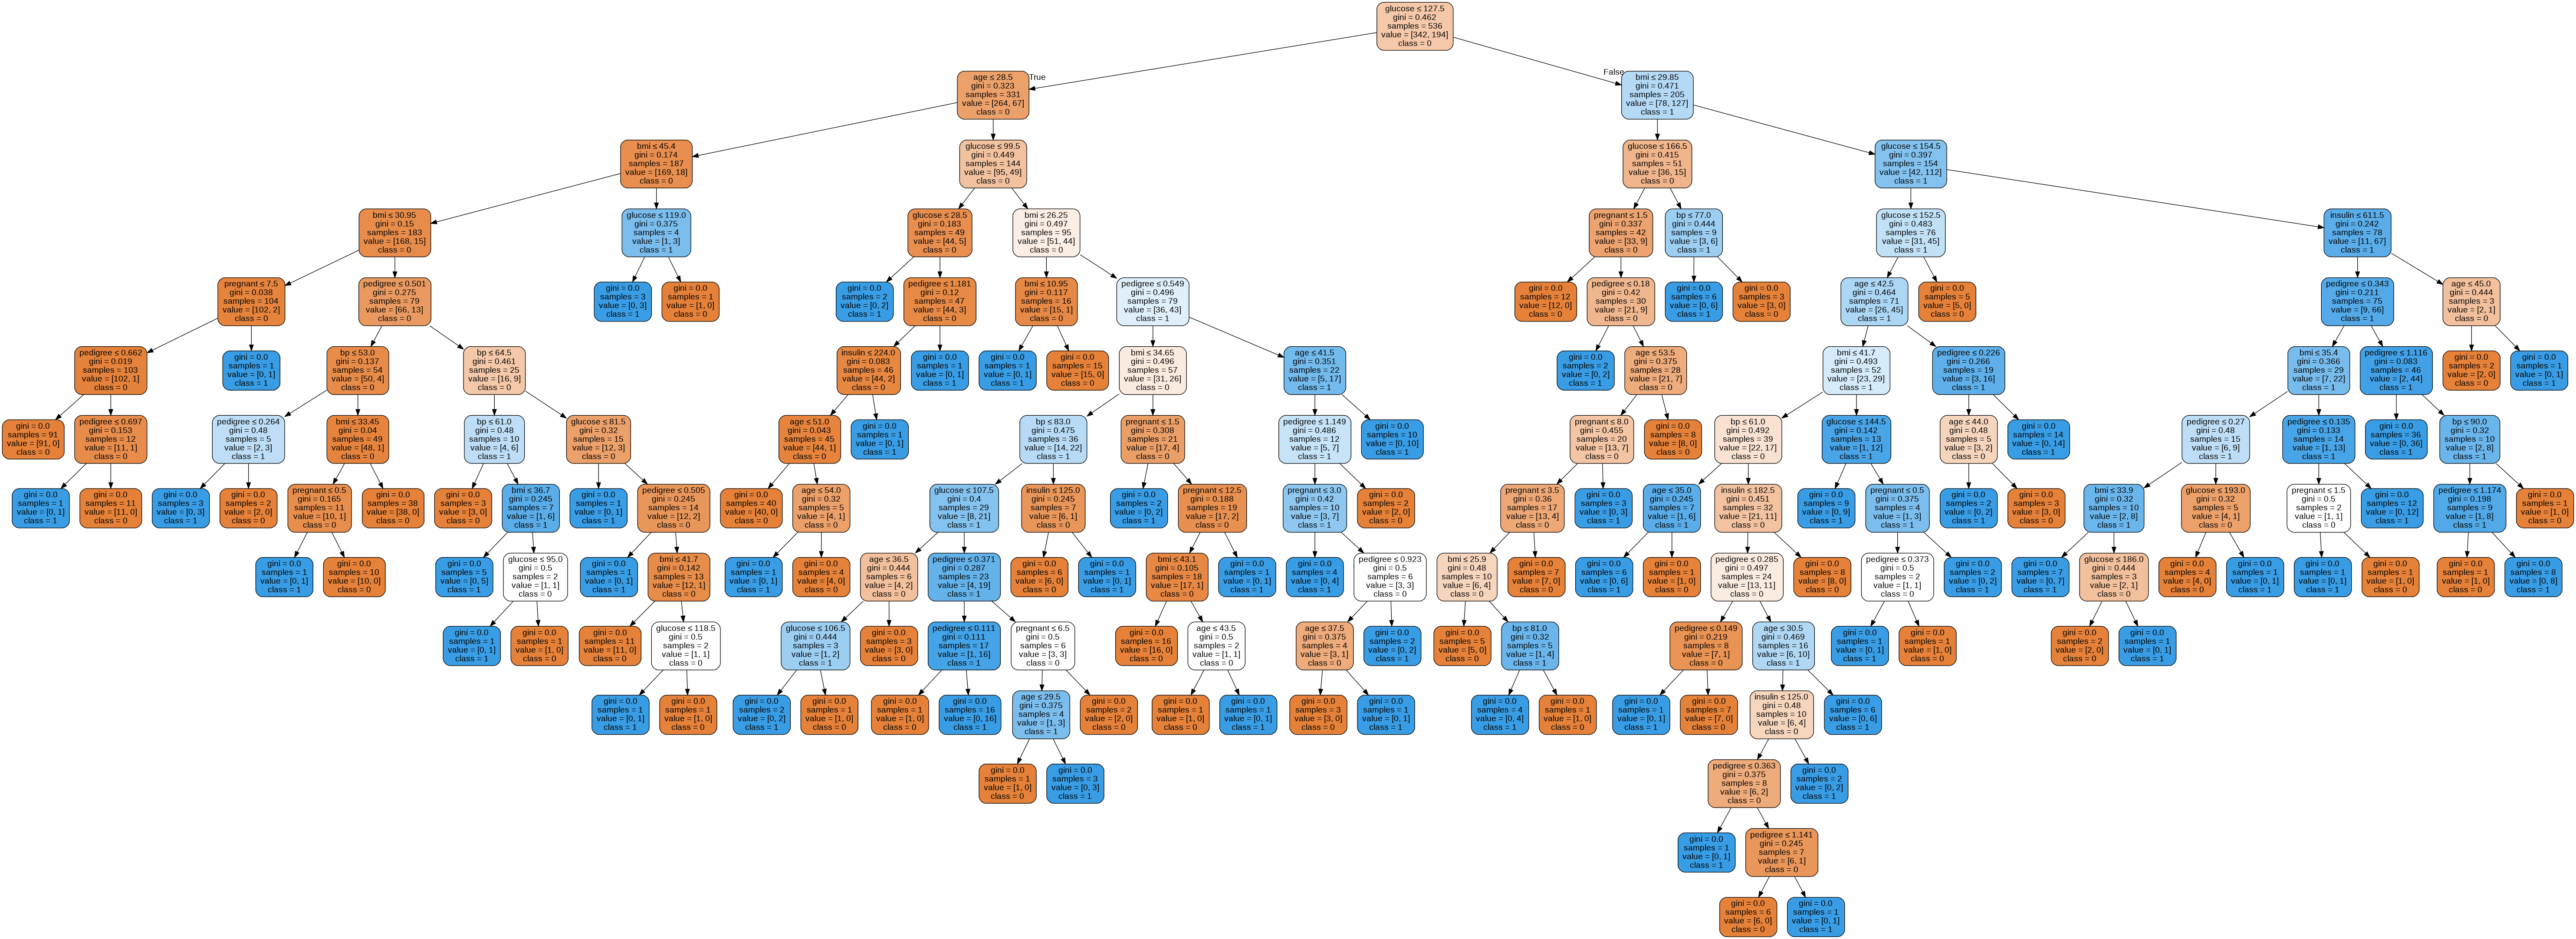

In [15]:
#Visualizing the Desicison Trees
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(decision_tree_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = predictor_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())